<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Stacking이란..?" data-toc-modified-id="Stacking이란..?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Stacking이란..?</a></span></li><li><span><a href="#Stacking-Starter" data-toc-modified-id="Stacking-Starter-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Stacking Starter</a></span><ul class="toc-item"><li><span><a href="#Intro-to-Ensemble/Stacking-in-Classification" data-toc-modified-id="Intro-to-Ensemble/Stacking-in-Classification-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Intro to Ensemble/Stacking in Classification</a></span><ul class="toc-item"><li><span><a href="#Stacking-overview" data-toc-modified-id="Stacking-overview-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Stacking overview</a></span></li><li><span><a href="#Overfitting을-방지하기-위해-cross-validation-형태의-stacking-사용." data-toc-modified-id="Overfitting을-방지하기-위해-cross-validation-형태의-stacking-사용.-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Overfitting을 방지하기 위해 cross validation 형태의 stacking 사용.</a></span></li></ul></li><li><span><a href="#Load-libraries" data-toc-modified-id="Load-libraries-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load libraries</a></span></li><li><span><a href="#Ensembling-&amp;-Stacking-models" data-toc-modified-id="Ensembling-&amp;-Stacking-models-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Ensembling &amp; Stacking models</a></span><ul class="toc-item"><li><span><a href="#Helpers-via-Python-Classes" data-toc-modified-id="Helpers-via-Python-Classes-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Helpers via Python Classes</a></span></li></ul></li><li><span><a href="#Out-of-Fold-Predictions" data-toc-modified-id="Out-of-Fold-Predictions-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Out-of-Fold Predictions</a></span></li><li><span><a href="#Generating-our-Base-First-Level-Models" data-toc-modified-id="Generating-our-Base-First-Level-Models-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Generating our Base First-Level Models</a></span></li><li><span><a href="#Second-Level-Predictions-from-the-First-level-Output" data-toc-modified-id="Second-Level-Predictions-from-the-First-level-Output-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Second-Level Predictions from the First-level Output</a></span></li></ul></li><li><span><a href="#Stacking_Test-Sklearn_XGBoost_CatBoost_LightGBM" data-toc-modified-id="Stacking_Test-Sklearn_XGBoost_CatBoost_LightGBM-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Stacking_Test-Sklearn_XGBoost_CatBoost_LightGBM</a></span></li></ul></div>

# Stacking이란..?

[Medium article on Stacking-Ensemble meta algorithms for Improving Predictions](https://medium.com/ml-research-lab/stacking-ensemble-meta-algorithms-for-improve-predictions-f4b4cf3b9237)

![](https://miro.medium.com/max/640/0*dTmUzv-D7-A8KkE_.webp)

<center><figcaption>Source:http://rasbt.github.io/ </figcaption></center>

![](https://miro.medium.com/max/786/0*e-na5r7mF8lVAfPK.webp)

<center><figcaption>Source:https://data-science-blog.com/ </figcaption></center>

Ensemble 기법 중에 Bagging도 있었고, Boosting도 있었고...

Stacking은 또 다른 ensemble 기법이다. (주로 Kaggle competition에서 점수를 조금이라도 높이고자 할때 사용한다고 함.)

# Stacking Starter

## Intro to Ensemble/Stacking in Classification

[Intro to Ensemble/Stacking in Classification](https://www.kaggle.com/code/sangseoseo/intro-to-ensemble-stacking-in-classification) by SANGSEOSEO $\rightarrow$ leads to [Introduction to Ensembling/Stacking in Python](https://www.kaggle.com/code/arthurtok/introduction-to-ensembling-stacking-in-python/notebook) by Anisotropic (Data Scientist at Barclays DASA)

Introduction to Ensembling/Stacking in Python (by Anisotropic)을 기준으로 진행.

Introductory primer to the method of ensembling (combining) base learning models, in particular the variant of ensembling known as Stacking.

--> 스태킹은 앙상블의 한 종류이다.

In a nutshell stacking uses another model at the second-level to predict the output from the earlier first-level predictions.

앙상블 및 스태킹 소개

앙상블 기법은 좀 성능이 떨어지는 여러 대의 분류기가 학습 데이터를 학습 및 예측하여 나온 예측 결과를 다수결로 결정하는 방식의 분류기 (majority voting)와 동일한 분류기를 사용하지만 각각의 학습 데이터의 샘플링을 달리하여 예측한 결과를 평균값으로 결정하는 방식이 있습니다.

스태킹 기법은 각각의 분류기가 학습 후 예측한 결과를 볏짚 쌓듯이 차곡차곡 쌓아서 이를 다시 최종 메타 분류기가 다시 한 번 학습 및 예측하는 기법.

즉, **개별 모델이 예측한 예측값을 input으로 하여 다시 training set으로 사용해서 학습**한다는 것.

--> (스태킹 앙상블의 기본적인 구조)

이 분이 정말 설명을 잘해놓으셨음[lsjsj92님의 티스토리](https://lsjsj92.tistory.com/558)). --> 링크 열고 그림 보면서 설명.
Stacking ensemble summary:

1. 원본 데이터의 train, test가 존재.
2. 원본 training data를 여러개의 머신러닝 모델이 학습. (이 모델들을 base model, 또는 first-level model이라고 부릅니다.)
3. 각 모델마다 `X_test`를 넣어서 예측 후 `prediction` 값을 뽑아냄
4. `prediction`을 다시 학습 데이터로 사용
5. 최종 model을 하나 선정하여 학습. (예측값을 학습하는 모델을 meta model, 또는 second-level model이라고 부릅니다.)
6. 최종 평가

이 Medium article도 굉장히 설명을 잘해놓았는데, 그 중에서 마음에 드는 구절은 이것이었다.

- 스태킹이 useful한 경우:

    - Stacking is particularly useful when the results of the individual algorithms can be very different, which is almost always the case with regression — since continuous values instead of a few classes. Stacking algorithms can even span several layers, which makes their training much more difficult.

- 스태킹이 하는 일:
    1. Averaging: Take P1, P2, ... Pm and do the averaging of that.
    
    ![](https://miro.medium.com/max/720/0*TFFGP9bLZClAW-8W.webp)
    
    2. Weighted Averaging: Take weights for particular features (in this case weighting the prediction results of each base model) as per their importance and we get the final result.

    ![](https://miro.medium.com/max/786/0*4bINc0mCwIy7-b4a.webp)

    - Stacking help us by doing averaging that result which we got from training the classifier or by doing weighted sum as well.

더 자세한 설명. 이 설명이 더 좋다.
[[ML] Scikit-learn을 이용한 Stacking 구현하기 by YounghunJo](https://techblog-history-younghunjo1.tistory.com/103)

### Stacking overview

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FqlNM8%2FbtqGfNTsXAK%2FwZKuqNJXtceJw4eMIdqLjK%2Fimg.png)

### Overfitting을 방지하기 위해 cross validation 형태의 stacking 사용.

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FvE1KY%2FbtqGfMNMYUY%2FwKw7mEQ4PcRvXlJlsqIxSK%2Fimg.png)

해당 노트북은 [Stacking Starter](https://www.kaggle.com/mmueller/allstate-claims-severity/stacking-starter/run/390867): by Faron에서 상당 부분을 가져왔음.

(그래서 이 노트북의 이름이 `Stacking Test-Sklearn`)

## Load libraries

Feature Exploration, Engineering and Cleaning
...
Ensembling & Stacking models

## Ensembling & Stacking models

Finally after that brief whirlwind detour with regards to feature engineering and formatting, we finally arrive at the meat and gist of this notebook.

Creating s Stacking ensemble!

### Helpers via Python Classes

HEre we invoke the use of Python's classes ot help make it more conveninet for us. For any newcomers to programming, one normally hears Classes being used in conjunction with Object-Oriented Programming (OOP). In short, a class helps to extend some code/program for creating objects (variables for old-school peeps) as well as to implement functions and methods specific to that class. --> Abstraction!

In the section of code below, we essentially write a class `SklearnHelper` that allows one to extend the inbuilt methods (such as train, predict and fit) common to all the Sklearn classifiers. Therefore this cuts out redundancy as won't need to write the same methods five times if we wanted to invoke five different classifiers.

## Out-of-Fold Predictions

- Out-of-fold prediction: [How to Use Out-of-Fold Predictions in Machine Learning](https://machinelearningmastery.com/out-of-fold-predictions-in-machine-learning/)

    - What are Out-of-Fold Predictions?
        It's common practice to use k-fold cross-validation to evaluate the performance of a machine learning. The k-fold cross-validation procedure involves training and evaluating *k* different models.
        Summary of K-folds:
            1. Shuffle the dataset randomly.
            2. Split the dataset into k groups.
            3. For each unique group:
                a. Take the group as a **holdout** or test data set.
                b. Take the remaining groups as a training data set.
                c. Fit a model on the training set and evaluate it on the test set.
                d. Retain the evaluation score and discard the model.
            4. Summarize the performance of the model using the sample of model evaluation scores.
        An out-of-fold predictions here are the predictions made by models during the k-fold cross-validation procedure on the holdout examples. (validation set이라고 부를 수 있는)
        
Now as alluded above in the introductory section, stacking uses predictions of base classifers as input for training to a second-level model. However one cannot simply train the base models on the full training data, generate predictions on the full test set and then output these for the second-level training. Doing such thing runs the risk of your base model predictions already having "seen" the test set and therefore overfitting when feeding these predictions.

왜 out-of-fold prediction이 중요하냐? 그냥 보통의

## Generating our Base First-Level Models

So now let us prepare five learning models as our first level classification. These models can all be conveniently invoked via the Sklearn library and are listed as follows:

    1. Random Forest classifier
    2. Extra Trees classifier
    3. AdaBoost classifer
    4. Gradient Boosting classifer
    5. Support Vector Machine



Parameters

Just a quick summary of the parameters that we will be listing here for completeness,

`n_jobs` : Number of cores used for the training process. If set to -1, all cores are used.

`n_estimators` : Number of classification trees in your learning model ( set to 10 per default)

`max_depth` : Maximum depth of tree, or how much a node should be expanded. Beware if set to too high a number would run the risk of overfitting as one would be growing the tree too deep

`verbose` : Controls whether you want to output any text during the learning process. A value of 0 suppresses all text while a value of 3 outputs the tree learning process at every iteration.

Please check out the full description via the official Sklearn website. There you will find that there are a whole host of other useful parameters that you can play around with.


Training set test set 나누고... 이제 각각의 모델을 학습.

Training is complete.

각 모델에서 generation된 feature importance 살펴보고...

예시)

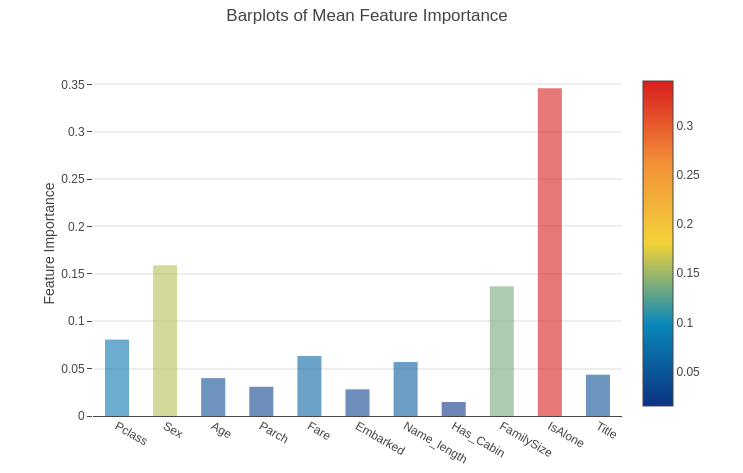


## Second-Level Predictions from the First-level Output



# Stacking_Test-Sklearn_XGBoost_CatBoost_LightGBM

In [8]:
# Stacking Starter based on Allstate Faron's Script
#https://www.kaggle.com/mmueller/allstate-claims-severity/stacking-starter/run/390867
# Preprocessing from ogrellier
#https://www.kaggle.com/ogrellier/good-fun-with-ligthgbm

import pandas as pd
import numpy as np
from scipy.stats import skew
import xgboost as xgb
#from sklearn.cross_validation import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from math import sqrt
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import gc

NFOLDS = 3
SEED = 0
NROWS = None

data = pd.read_csv('./CreditHome/application_train.csv')
test = pd.read_csv('./CreditHome/application_test.csv')
prev = pd.read_csv('./CreditHome/previous_application.csv')

# print('%-55s | %7s | %10s | %10s | %10s' 
#       % ('FEATURES', 'TYPE', 'NB VALUES', 'NB NaNS', 'NaNs (%)'))
# for f_ in data: # .dtypes
#     print("%-55s | %7s | %10s | %10s |    %5.2f"
#           % (f_, str(data[f_].dtype), 
#              str(len(data[f_].value_counts(dropna=False))), 
#              str(data[f_].isnull().sum()),
#              100 * data[f_].isnull().sum() / data.shape[0]
#             )
#          )
         
categorical_feats = [
    f for f in data.columns if data[f].dtype == 'object'
]

for f_ in categorical_feats:
    data[f_], indexer = pd.factorize(data[f_])
    test[f_] = indexer.get_indexer(test[f_])
    
gc.enable()

y_train = data['TARGET']
del data['TARGET']

###################################
# PLEASE DON'T DO THIS AT HOME LOL
# Averaging factorized categorical features defeats my own reasoning
################################### 
prev_cat_features = [
    f_ for f_ in prev.columns if prev[f_].dtype == 'object'
]
for f_ in prev_cat_features:
    prev[f_], _ = pd.factorize(prev[f_])
    
avg_prev = prev.groupby('SK_ID_CURR').mean()
cnt_prev = prev[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
avg_prev['nb_app'] = cnt_prev['SK_ID_PREV']
del avg_prev['SK_ID_PREV']

x_train = data.merge(right=avg_prev.reset_index(), how='left', on='SK_ID_CURR')
x_test = test.merge(right=avg_prev.reset_index(), how='left', on='SK_ID_CURR')

x_train = x_train.fillna(0)
x_test= x_test.fillna(0)

ntrain = x_train.shape[0]
ntest = x_test.shape[0]

excluded_feats = ['SK_ID_CURR']
features = [f_ for f_ in x_train.columns if f_ not in excluded_feats]

x_train = x_train[features]
x_test = x_test[features]

kf = KFold(n_splits = NFOLDS, shuffle=True, random_state=SEED)

class SklearnWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict_proba(x)[:,1]

class CatboostWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_seed'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict_proba(x)[:,1]
        
class LightGBMWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        params['feature_fraction_seed'] = seed
        params['bagging_seed'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict_proba(x)[:,1]


class XgbWrapper(object):
    def __init__(self, seed=0, params=None):
        self.param = params
        self.param['seed'] = seed
        self.nrounds = params.pop('nrounds', 250)

    def train(self, x_train, y_train):
        dtrain = xgb.DMatrix(x_train, label=y_train)
        self.gbdt = xgb.train(self.param, dtrain, self.nrounds)

    def predict(self, x):
        return self.gbdt.predict(xgb.DMatrix(x))


def get_oof(clf):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train.loc[train_index]
        y_tr = y_train.loc[train_index]
        x_te = x_train.loc[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)


et_params = {
    'n_jobs': 16,
    'n_estimators': 200,
    'max_features': 0.5,
    'max_depth': 12,
    'min_samples_leaf': 2,
}

rf_params = {
    'n_jobs': 16,
    'n_estimators': 200,
    'max_features': 0.2,
    'max_depth': 12,
    'min_samples_leaf': 2,
}

xgb_params = {
    'seed': 0,
    'colsample_bytree': 0.7,
    'silent': 1,
    'subsample': 0.7,
    'learning_rate': 0.075,
    'objective': 'binary:logistic',
    'max_depth': 4,
    'num_parallel_tree': 1,
    'min_child_weight': 1,
    'nrounds': 200
}

catboost_params = {
    'iterations': 200,
    'learning_rate': 0.5,
    'depth': 3,
    'l2_leaf_reg': 40,
    'bootstrap_type': 'Bernoulli',
    'subsample': 0.7,
    'scale_pos_weight': 5,
    'eval_metric': 'AUC',
    'od_type': 'Iter',
    'allow_writing_files': False
}

lightgbm_params = {
    'n_estimators':200,
    'learning_rate':0.1,
    'num_leaves':123,
    'colsample_bytree':0.8,
    'subsample':0.9,
    'max_depth':15,
    'reg_alpha':0.1,
    'reg_lambda':0.1,
    'min_split_gain':0.01,
    'min_child_weight':2    
}

xg = XgbWrapper(seed=SEED, params=xgb_params)
et = SklearnWrapper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
rf = SklearnWrapper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
cb = CatboostWrapper(clf= CatBoostClassifier, seed = SEED, params=catboost_params)
lg = LightGBMWrapper(clf = LGBMClassifier, seed = SEED, params = lightgbm_params)

xg_oof_train, xg_oof_test = get_oof(xg)
et_oof_train, et_oof_test = get_oof(et)
rf_oof_train, rf_oof_test = get_oof(rf)
cb_oof_train, cb_oof_test = get_oof(cb)

print("XG-CV: {}".format(sqrt(mean_squared_error(y_train, xg_oof_train))))
print("ET-CV: {}".format(sqrt(mean_squared_error(y_train, et_oof_train))))
print("RF-CV: {}".format(sqrt(mean_squared_error(y_train, rf_oof_train))))
print("RF-CV: {}".format(sqrt(mean_squared_error(y_train, cb_oof_train))))

x_train = np.concatenate((xg_oof_train, et_oof_train, rf_oof_train, cb_oof_train), axis=1)
x_test = np.concatenate((xg_oof_test, et_oof_test, rf_oof_test, cb_oof_test), axis=1)

print("{},{}".format(x_train.shape, x_test.shape))

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)

test['TARGET'] = logistic_regression.predict_proba(x_test)[:,1]

test[['SK_ID_CURR', 'TARGET']].to_csv('first_submission.csv', index=False, float_format='%.8f')



[21:46:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:48:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:49:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1667849527992/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.

0:	total: 89ms	remaining: 17.7s
1:	total: 129ms	remaining: 12.7s
2:	total: 161ms	remaining: 10.6s
3:	total: 205ms	remaining: 10s
4:	total: 246ms	remaining: 9.59s
5:	total: 282ms	remaining: 9.13s
6:	total: 328ms	remaining: 9.04s
7:	total: 362ms	remaining: 8.69s
8:	total: 399ms	remaining: 8.46s
9:	total: 437ms	remaining: 8.31s
10:	total: 472ms	remaining: 8.11s
11:	total: 514ms	remaining: 8.05s
12:	total: 562ms	remaining: 8.08s
13:	total: 604ms	remaining: 8.02s
14:	total: 645ms	remaining: 7.95s
15:	total: 683ms	remaining: 7.85

29:	total: 1.19s	remaining: 6.75s
30:	total: 1.23s	remaining: 6.7s
31:	total: 1.27s	remaining: 6.66s
32:	total: 1.3s	remaining: 6.59s
33:	total: 1.34s	remaining: 6.53s
34:	total: 1.37s	remaining: 6.47s
35:	total: 1.41s	remaining: 6.42s
36:	total: 1.45s	remaining: 6.39s
37:	total: 1.49s	remaining: 6.34s
38:	total: 1.52s	remaining: 6.28s
39:	total: 1.56s	remaining: 6.23s
40:	total: 1.6s	remaining: 6.19s
41:	total: 1.64s	remaining: 6.16s
42:	total: 1.68s	remaining: 6.13s
43:	total: 1.72s	remaining: 6.09s
44:	total: 1.75s	remaining: 6.04s
45:	total: 1.79s	remaining: 5.99s
46:	total: 1.82s	remaining: 5.94s
47:	total: 1.87s	remaining: 5.91s
48:	total: 1.91s	remaining: 5.88s
49:	total: 1.94s	remaining: 5.83s
50:	total: 1.98s	remaining: 5.79s
51:	total: 2.02s	remaining: 5.75s
52:	total: 2.06s	remaining: 5.71s
53:	total: 2.1s	remaining: 5.68s
54:	total: 2.14s	remaining: 5.64s
55:	total: 2.18s	remaining: 5.62s
56:	total: 2.23s	remaining: 5.59s
57:	total: 2.27s	remaining: 5.56s
58:	total: 2.31s	r

71:	total: 2.8s	remaining: 4.97s
72:	total: 2.84s	remaining: 4.94s
73:	total: 2.88s	remaining: 4.9s
74:	total: 2.92s	remaining: 4.87s
75:	total: 2.96s	remaining: 4.83s
76:	total: 3.01s	remaining: 4.8s
77:	total: 3.05s	remaining: 4.77s
78:	total: 3.08s	remaining: 4.72s
79:	total: 3.12s	remaining: 4.68s
80:	total: 3.15s	remaining: 4.63s
81:	total: 3.19s	remaining: 4.59s
82:	total: 3.23s	remaining: 4.55s
83:	total: 3.27s	remaining: 4.52s
84:	total: 3.31s	remaining: 4.48s
85:	total: 3.35s	remaining: 4.44s
86:	total: 3.39s	remaining: 4.4s
87:	total: 3.42s	remaining: 4.36s
88:	total: 3.46s	remaining: 4.32s
89:	total: 3.5s	remaining: 4.28s
90:	total: 3.54s	remaining: 4.24s
91:	total: 3.58s	remaining: 4.2s
92:	total: 3.62s	remaining: 4.17s
93:	total: 3.66s	remaining: 4.13s
94:	total: 3.71s	remaining: 4.09s
95:	total: 3.75s	remaining: 4.06s
96:	total: 3.78s	remaining: 4.01s
97:	total: 3.82s	remaining: 3.98s
98:	total: 3.87s	remaining: 3.95s
99:	total: 3.92s	remaining: 3.92s
100:	total: 3.96s	re